# 1 Image feature extraction
Outline:
- 1.1 Function definitions - note: run all the cells before trying to run new experiments
- 1.2 Experiments
    - dfdf 

## 1.1 Function definitions
Loading the necessary libaries

In [106]:
import numpy as np
from sklearn.feature_extraction import image
from sklearn.decomposition import PCA
from skimage.io import imread
from skimage.transform import resize
import matplotlib.pyplot as plt
import math

Image loading and spliting each image into patches. The idea here is to treat each image as a seperate data set with:
- Number of datapoints = numeber of patches
- Number of features = dimension of a single patch

In [107]:
path_list = []
for i in range(17):
    path = "img_data/img" + str(i+1) + ".jpg"
    path_list.append(path)

print(path_list)

def split_patches(path_list):
    patches_list = []
    for path in path_list:
        img = imread(path, as_gray=True)
        original_height, original_width = img.shape
        max_size = 200
        scaling_factor = min(max_size / original_height, max_size / original_width)
        new_height = int(original_height * scaling_factor)
        new_width = int(original_width * scaling_factor)
        # Resize the image
        img = resize(img, (new_height, new_width), anti_aliasing=True)
        #print(img.shape)
        patches = image.extract_patches_2d(img,(30,30))
        #print(patches.shape)
        num_patches = patches.shape[0]
        flat_patches = patches.reshape(num_patches,-1)
        patches_list.append(flat_patches)
    return patches_list


['img_data/img1.jpg', 'img_data/img2.jpg', 'img_data/img3.jpg', 'img_data/img4.jpg', 'img_data/img5.jpg', 'img_data/img6.jpg', 'img_data/img7.jpg', 'img_data/img8.jpg', 'img_data/img9.jpg', 'img_data/img10.jpg', 'img_data/img11.jpg', 'img_data/img12.jpg', 'img_data/img13.jpg', 'img_data/img14.jpg', 'img_data/img15.jpg', 'img_data/img16.jpg', 'img_data/img17.jpg']


Feature reduction with PCA

In [108]:
def pca_reduction(patches_list):
    pca = PCA(n_components=2)
    reduced_patches_list = []
    for p in patches_list:
        reduced_p = pca.fit_transform(p)
        reduced_patches_list.append(reduced_p)
    return reduced_patches_list

Visualizing a list of datasets with 2d scatterplots

In [109]:
def plot_vis(plot_list): #takes a list of data sets to visualize in a scatter plot. Each entry should have format of list of arrays with each array n*2
    num_plot = len(plot_list)
    cols = 3
    rows = math.ceil(num_plot / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 3))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing

    for i, plot in enumerate(plot_list):
        x = plot[:, 0]
        y = plot[:, 1]
        ax = axes[i]
        ax.scatter(x, y, s=1, alpha=0.5)  # Use scatter plot for large datasets
        ax.set_title("img" + str(i+1))
        ax.grid(True)
         
    plt.tight_layout()
    plt.show()

## 1.2 Experiments

### Experiment 01
Visualize each image in a scatterplot. Here the idea is that each image represents an individual data set where the features have been reduced through PCA

image preprocessing done
feature reduction done


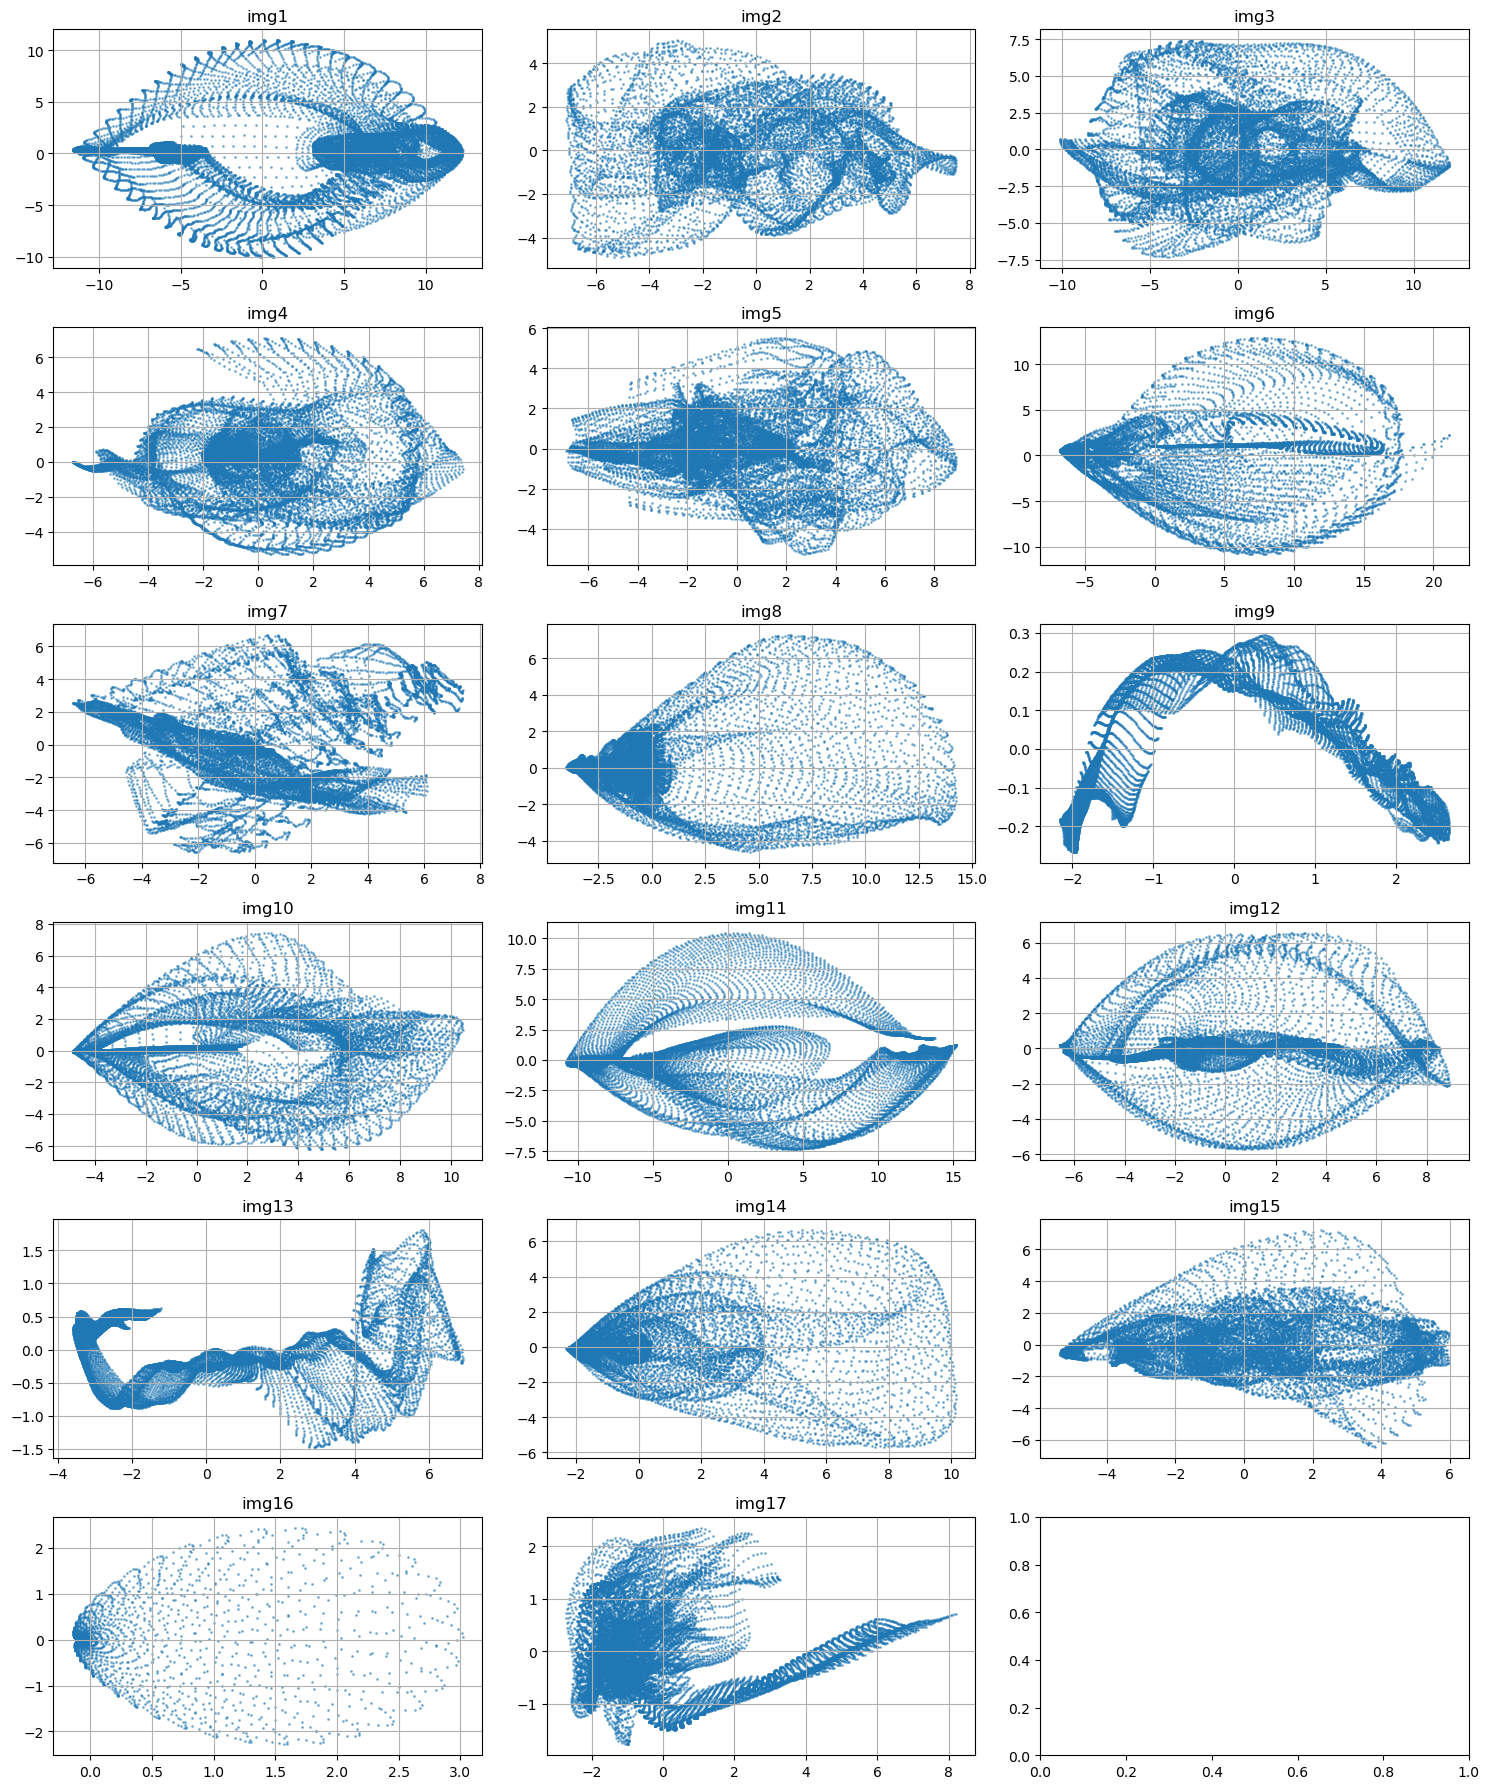

In [110]:
patches = split_patches(path_list)
print("image preprocessing done")
reduced_patches = pca_reduction(patches)
print("feature reduction done")
plot_vis(reduced_patches)